In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
classifier = Sequential()

#convolutional layer with input layer
classifier.add(Convolution2D(32, 3,  3, input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#convolutional layer with 32 newrons
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#convolutional layer with 64 newrons
classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#convolutional layer with 128 newrons
classifier.add(Convolution2D(128, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#convolutional layer with 256 newrons
classifier.add(Convolution2D(256, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#flatten layer
classifier.add(Flatten())
#dense layer with 4096 newrons
classifier.add(Dense(4096, activation = 'relu'))
classifier.add(Dropout(0.5))

#dense layer with 4096 newrons
classifier.add(Dense(4096, activation = 'relu'))
classifier.add(Dropout(0.5))

#dense layer for classification of species. change the number as per number of species.
#softmax function predicts probability
classifier.add(Dense(7, activation = 'softmax'))


classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
			  
#classifier.summary()

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'tigersAndZebra/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'tigersAndZebra/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=180,
        epochs=25,
        validation_data = test_set,
        validation_steps = 250
      )

C:\Users\Moz\.conda\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Moz\.conda\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
C:\Users\Moz\.conda\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
C:\Users\Moz\.conda\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  app.launch_new_instance()
C:\Users\Moz\.conda\envs\tfkeras\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")

Found 4900 images belonging to 7 classes.
Found 1890 images belonging to 7 classes.
Epoch 1/25
180/180 [==============================] - 457s 3s/step - loss: 1.9421 - acc: 0.1580 - val_loss: 1.9302 - val_acc: 0.1532
Epoch 2/25
180/180 [==============================] - 353s 2s/step - loss: 1.9202 - acc: 0.1997 - val_loss: 1.8716 - val_acc: 0.2982
Epoch 3/25
180/180 [==============================] - 346s 2s/step - loss: 1.8519 - acc: 0.2483 - val_loss: 1.7435 - val_acc: 0.3330
Epoch 4/25
180/180 [==============================] - 343s 2s/step - loss: 1.7195 - acc: 0.3257 - val_loss: 1.6030 - val_acc: 0.4053
Epoch 5/25
180/180 [==============================] - 350s 2s/step - loss: 1.6206 - acc: 0.3819 - val_loss: 1.4871 - val_acc: 0.4416
Epoch 6/25
180/180 [==============================] - 349s 2s/step - loss: 1.4530 - acc: 0.4613 - val_loss: 1.6181 - val_acc: 0.3755
Epoch 7/25
180/180 [==============================] - 357s 2s/step - loss: 1.2907 - acc: 0.5236 - val_loss: 1.1570 - v

In [6]:
import h5py
classifier.save('final_model7.h5')

In [7]:
print(model.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


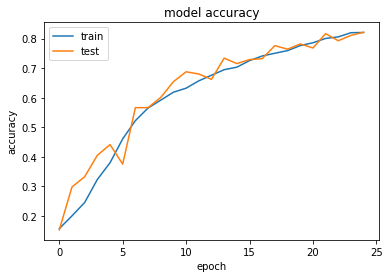

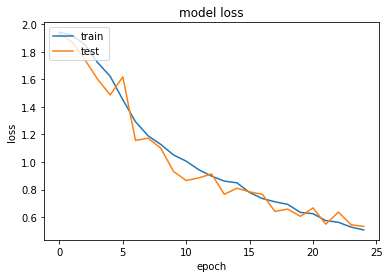

In [10]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('acc-7layer.png')
plt.show()


plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss-7layer.png')
plt.show()
